<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module09/network_models.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Models

## Introduction

So far in the course, we have studied various structures to model the location of different elements and relationships between them. For example, we employed 2D grids and cell proximity to represent the locations and connections between elements in the cellular automaton models and the agent-based simulations reviewed. This module will explore a different structure to represent more complex relationships: network models. 

In preparation for the live session, please watch the following video to learn about the importance of networks in our lives.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/RfgjHoVCZwU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

You will find a list of important concepts we will review in the module below.

- Edges
- Network models
- Networks
- Nodes

## Interaction

In this interation, we will create a network model to explore and analyze web browsing patterns, and focus on the transition or switch between different websites (domains). 

We will utilize a sample data set extracted from a research study that tracked the web browsing behaviour of 2,148 German users for one month in 2018. The data has been anonymized and the participants authorized its collection via a tracking software installed on their personal computer.

If you are interested, you can read more about the <a href="https://arxiv.org/abs/2012.15112">research study</a> and access the <a href="https://zenodo.org/records/4757574">research data</a> published. <b>Note that the research data contains links to sensitive content (adult websites, hate speech, etc.), so please be aware, and do not access or search unfamiliar websites</b>.

### Instructions

- Load the sample data into Jupyter.
- Explore the loaded data.
- Convert the data into a network model.
- Explore and analyze the network model.

### Initial Conditions, Assumptions, and Limitations

- The research data follows a sequential order organized by user.
- The network model focuses on the transitions between domains.
- The network model represents a single user.

In [ ]:
!pip install python-louvain

In [1]:
import pandas as pd

In [2]:
import networkx as nx

In [3]:
import matplotlib.pyplot as plt

In [4]:
import community

In [5]:
# Load the data into Jupyter
data = pd.read_excel('module09_data.xlsx', sheet_name='data')

In [6]:
data

id     prev_id  panelist_id              used_at  \
0     1009106048           0            1  2018-10-01 10:33:01   
1     1009106052  1009106048            1  2018-10-01 10:33:39   
2     1009106056  1009106052            1  2018-10-01 10:33:53   
3     1009106060  1009106056            1  2018-10-01 10:34:07   
4     1009106064  1009106060            1  2018-10-01 10:34:39   
...          ...         ...          ...                  ...   
8041  1092165015  1092165011         1137  2018-10-30 23:08:03   
8042  1092165019  1092165015         1137  2018-10-30 23:08:07   
8043  1092165023  1092165019         1137  2018-10-30 23:09:13   
8044  1092165027  1092165023         1137  2018-10-30 23:09:33   
8045  1092165031  1092165027         1137  2018-10-30 23:10:11   

                  left_at  active_seconds  top_level_domain  \
0     2018-10-01 10:33:39              38         myway.com   
1     2018-10-01 10:33:53              14  deutsche-bank.de   
2     2018-10-01 10:34:07              14  deutsche-bank.de   
3     2018-10-01 10:34:39              32  deutsche-bank.de   
4     2018-10-01 10:35:45              66  deutsche-bank.de   
...                   ...             ...               ...   
8041  2018-10-30 23:08:07               4       youtube.com   
8042  2018-10-30 23:09:13              66      facebook.com   
8043  2018-10-30 23:09:33              20      facebook.com   
8044  2018-10-30 23:10:11              38       youtube.com   
8045  2018-10-30 23:10:34              23      facebook.com   

                       category1            category2 category3  
0     search-engines and portals                  NaN       NaN  
1                       business  economy and finance       NaN  
2                       business  economy and finance       NaN  
3                       business  economy and finance       NaN  
4                       business  economy and finance       NaN  
...                          ...                  ...       ...  
8041               entertainment      streaming-media       NaN  
8042           social-networking                  NaN       NaN  
8043           social-networking                  NaN       NaN  
8044               entertainment      streaming-media       NaN  
8045           social-networking                  NaN       NaN  

[8046 rows x 10 columns]

In [7]:
# Group users by ID
panelist_ids = data.groupby('panelist_id').size().reset_index(name='counts')

In [8]:
panelist_ids

panelist_id  counts
0            1    4453
1         1137    3593

In [9]:
"""
Use the panelist_id value to select the user you want to analyze
"""
# Filter a single user
user_data = data[data['panelist_id'] == 1137]

In [10]:
user_data

id     prev_id  panelist_id              used_at  \
4453  1012622516           0         1137  2018-10-01 17:15:45   
4454  1012622520  1012622516         1137  2018-10-01 17:15:57   
4455  1012622524  1012622520         1137  2018-10-01 17:15:59   
4456  1012622528  1012622524         1137  2018-10-01 17:16:09   
4457  1012622532  1012622528         1137  2018-10-01 17:16:13   
...          ...         ...          ...                  ...   
8041  1092165015  1092165011         1137  2018-10-30 23:08:03   
8042  1092165019  1092165015         1137  2018-10-30 23:08:07   
8043  1092165023  1092165019         1137  2018-10-30 23:09:13   
8044  1092165027  1092165023         1137  2018-10-30 23:09:33   
8045  1092165031  1092165027         1137  2018-10-30 23:10:11   

                  left_at  active_seconds top_level_domain          category1  \
4453  2018-10-01 17:15:57              12     facebook.com  social-networking   
4454  2018-10-01 17:15:59               2     facebook.com  social-networking   
4455  2018-10-01 17:16:09              10     facebook.com  social-networking   
4456  2018-10-01 17:16:13               4     facebook.com  social-networking   
4457  2018-10-01 17:16:19               6     facebook.com  social-networking   
...                   ...             ...              ...                ...   
8041  2018-10-30 23:08:07               4      youtube.com      entertainment   
8042  2018-10-30 23:09:13              66     facebook.com  social-networking   
8043  2018-10-30 23:09:33              20     facebook.com  social-networking   
8044  2018-10-30 23:10:11              38      youtube.com      entertainment   
8045  2018-10-30 23:10:34              23     facebook.com  social-networking   

            category2 category3  
4453              NaN       NaN  
4454              NaN       NaN  
4455              NaN       NaN  
4456              NaN       NaN  
4457              NaN       NaN  
...               ...       ...  
8041  streaming-media       NaN  
8042              NaN       NaN  
8043              NaN       NaN  
8044  streaming-media       NaN  
8045              NaN       NaN  

[3593 rows x 10 columns]

In [11]:
# Group records by category1
visited_categories = user_data.groupby('category1').size().reset_index(name='counts')

In [12]:
visited_categories

category1  counts
0                 advertising       1
1                    business     622
2               entertainment    1170
3            information-tech       8
4              news and media      11
5  search-engines and portals      20
6                    shopping     242
7           social-networking    1519

In [13]:
# Group records by website (domain)
visited_domains = user_data.groupby('top_level_domain').size().reset_index(name='counts')

In [14]:
visited_domains

top_level_domain  counts
0              action.com       9
1            aldi-sued.de       3
2          aliexpress.com      63
3              alipay.com       5
4               amazon.de      90
5          autoscout24.de      23
6             avature.net       8
7            banggood.com       1
8          bastel-welt.de       1
9           beemybear.com       7
10                bild.de       6
11                 bit.ly       1
12         buttinette.com       2
13            carnext.com       1
14    creartive-corner.de      38
15           derwesten.de       2
16        doreenbeads.com       1
17        doubleclick.net       1
18  ebay-kleinanzeigen.de      17
19                ebay.de      67
20               etsy.com      16
21             eventim.de       3
22           facebook.com    1506
23         faltkarten.com       1
24              google.de      20
25             groupon.de       1
26   immobilienscout24.de      32
27          instagram.com      13
28         kreativbunt.de     209
29        leasingmarkt.de       4
30            meinauto.de       3
31             nbeads.com       7
32                otto.de       1
33             paypal.com      12
34            rossmann.de       4
35         scrapabilly.de      16
36               shoop.de       1
37       sixt-neuwagen.de       5
38          skoda-auto.de       5
39            smarter.com       5
40             spiegel.de       1
41          stampinup.com     105
42    stationeryheaven.nl       8
43       stempelmuehle.de      13
44               supr.com      23
45           telegram.org      17
46          vbs-hobby.com      31
47                 waz.de       2
48               wish.com      13
49            youtube.com    1170

In [106]:
visited_domains.to_excel('visited_domains.xlsx', index=False, header=True)

In [107]:
# Create an empty dictonary
nodes = {
    'start_node': [],
    'end_node': []
}

In [108]:
# Convert the sequential data into a data structure that can be used to create a network model
for index, row in user_data.iterrows():
    
    linked_rows = user_data.loc[user_data['prev_id'] == row['id']]
    
    if (len(linked_rows)>0):
        nodes['start_node'].append(row['top_level_domain'])
        nodes['end_node'].append(linked_rows.iloc[0]['top_level_domain']) # Select the first row of the dataframe

In [109]:
nodes

{'start_node': ['facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'facebook.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'instagram.com',
  'youtube.com',
  'youtube.com',
  'instagram.com',
  'youtube.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'youtube.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'instagram.com',
  'youtube.com',
  'facebook.com',
  'facebook.com',
  'youtube.com',
  'facebook.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'youtube.com',
  'google.de',
  'sixt-neuwagen.de',
  'sixt-neuwagen.de',
  'sixt-neuwagen.de',
  'sixt-neuwagen.de',
  'sixt-neuwagen.de',
  'goog

In [110]:
# Convert a dictionary into a dataframe
nodes = pd.DataFrame.from_dict(nodes)

In [111]:
nodes

start_node      end_node
0     facebook.com  facebook.com
1     facebook.com  facebook.com
2     facebook.com  facebook.com
3     facebook.com  facebook.com
4     facebook.com  facebook.com
...            ...           ...
3587  facebook.com   youtube.com
3588   youtube.com  facebook.com
3589  facebook.com  facebook.com
3590  facebook.com   youtube.com
3591   youtube.com  facebook.com

[3592 rows x 2 columns]

In [112]:
# Group the data by start and end nodes
nodes = nodes.groupby(['start_node','end_node']).size().reset_index(name='count')

In [113]:
nodes

start_node       end_node  count
0      action.com     action.com      3
1      action.com   facebook.com      1
2      action.com    youtube.com      5
3    aldi-sued.de   aldi-sued.de      2
4    aldi-sued.de    youtube.com      1
..            ...            ...    ...
176   youtube.com   telegram.org     10
177   youtube.com  vbs-hobby.com     12
178   youtube.com         waz.de      1
179   youtube.com       wish.com      5
180   youtube.com    youtube.com    538

[181 rows x 3 columns]

In [114]:
# Create an empty network (graph)
G = nx.Graph()

In [96]:
# Add nodes and edges (connections) to the graph
for index, row in nodes.iterrows():
    if (row['start_node']!=row['end_node'] and row['count']>=1):
        if (not G.has_node(row['start_node'])):
            G.add_node(row['start_node'])
        if (not G.has_node(row['end_node'])):
            G.add_node(row['end_node'])
        G.add_edge(row['start_node'],row['end_node'])

In [115]:
for index, row in nodes.iterrows():
    if (not G.has_node(row['start_node'])):
        G.add_node(row['start_node'])
    if (not G.has_node(row['end_node'])):
        G.add_node(row['end_node'])
    G.add_edge(row['start_node'],row['end_node'])

In [116]:
# Print the number of nodes
print('Nodes: ',G.number_of_nodes())

Nodes:  50


In [117]:
# Print the number of edges (connections)
print('Edges: ',G.number_of_edges())

Edges:  126


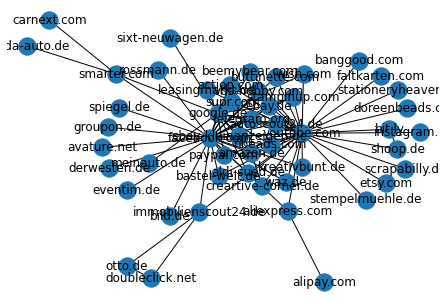

In [118]:
# Visualize the graph
nx.draw(G,with_labels=True)

In [119]:
# Visualize the graph
fig = plt.figure(1, figsize=(50, 50), dpi=200)

nx.draw(G, with_labels=True, node_color='lightblue', font_weight='normal', node_size=1500, width=1)

In [120]:
fig = plt.figure(1, figsize=(50, 50), dpi=200)

# Compute the best partition
partition = community.best_partition(G)

# Visualize the communities
pos = nx.spring_layout(G)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

nx.draw_networkx_labels(G, pos, labels=labels)

cmap = plt.cm.get_cmap('jet', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=1000, cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [121]:
# Print communities
for i, com in enumerate(set(partition.values())):
    members = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(f"Community {i}: {members}")

Community 0: ['action.com', 'aldi-sued.de', 'google.de', 'autoscout24.de', 'ebay-kleinanzeigen.de', 'supr.com', 'leasingmarkt.de', 'meinauto.de', 'sixt-neuwagen.de', 'wish.com']
Community 1: ['facebook.com', 'avature.net', 'bastel-welt.de', 'bild.de', 'derwesten.de', 'eventim.de', 'groupon.de', 'kreativbunt.de', 'paypal.com', 'rossmann.de', 'spiegel.de', 'waz.de']
Community 2: ['nbeads.com']
Community 3: ['aliexpress.com', 'alipay.com']
Community 4: ['amazon.de', 'creartive-corner.de']
Community 5: ['youtube.com', 'banggood.com', 'beemybear.com', 'bit.ly', 'shoop.de', 'buttinette.com', 'doreenbeads.com', 'etsy.com', 'faltkarten.com', 'instagram.com', 'scrapabilly.de', 'stationeryheaven.nl', 'stempelmuehle.de']
Community 6: ['carnext.com', 'smarter.com', 'skoda-auto.de']
Community 7: ['doubleclick.net', 'otto.de', 'immobilienscout24.de']
Community 8: ['ebay.de', 'stampinup.com', 'telegram.org', 'vbs-hobby.com']


In [122]:
# Calculate and print basic metrics

# A node's degree represents how many connections (i.e., edges) a node has. The higher the value, the more central the node is.

# "The degree centrality for a node v is the fraction of nodes it is connected to."

nx.degree_centrality(G)

{'action.com': 0.1020408163265306,
 'facebook.com': 0.6326530612244897,
 'youtube.com': 0.7346938775510203,
 'aldi-sued.de': 0.08163265306122448,
 'aliexpress.com': 0.1020408163265306,
 'alipay.com': 0.061224489795918366,
 'amazon.de': 0.14285714285714285,
 'creartive-corner.de': 0.1020408163265306,
 'google.de': 0.3877551020408163,
 'autoscout24.de': 0.1020408163265306,
 'avature.net': 0.061224489795918366,
 'banggood.com': 0.02040816326530612,
 'bastel-welt.de': 0.04081632653061224,
 'beemybear.com': 0.08163265306122448,
 'bild.de': 0.061224489795918366,
 'bit.ly': 0.04081632653061224,
 'shoop.de': 0.04081632653061224,
 'buttinette.com': 0.04081632653061224,
 'carnext.com': 0.02040816326530612,
 'smarter.com': 0.12244897959183673,
 'derwesten.de': 0.061224489795918366,
 'doreenbeads.com': 0.02040816326530612,
 'doubleclick.net': 0.04081632653061224,
 'otto.de': 0.04081632653061224,
 'ebay-kleinanzeigen.de': 0.1020408163265306,
 'ebay.de': 0.14285714285714285,
 'stampinup.com': 0.1020

In [123]:
# Create a dataframe from a dictionary
degree_centrality = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index',columns=['degree_centrality'])

In [124]:
# Convert the dataframe index to a column and create a new index
degree_centrality = degree_centrality.rename_axis('domain').reset_index()

In [125]:
# "betweenness is a measure of how important the node is to the flow of information through a network."
nx.betweenness_centrality(G)

{'action.com': 0.0,
 'facebook.com': 0.4307681405895691,
 'youtube.com': 0.5294075963718821,
 'aldi-sued.de': 0.0,
 'aliexpress.com': 0.04081632653061224,
 'alipay.com': 0.0,
 'amazon.de': 0.0011337868480725622,
 'creartive-corner.de': 0.0,
 'google.de': 0.14647108843537415,
 'autoscout24.de': 0.0,
 'avature.net': 0.0,
 'banggood.com': 0.0,
 'bastel-welt.de': 0.0,
 'beemybear.com': 0.0,
 'bild.de': 0.0,
 'bit.ly': 0.0,
 'shoop.de': 0.0,
 'buttinette.com': 0.0,
 'carnext.com': 0.0,
 'smarter.com': 0.08078231292517006,
 'derwesten.de': 0.0,
 'doreenbeads.com': 0.0,
 'doubleclick.net': 0.0,
 'otto.de': 0.0,
 'ebay-kleinanzeigen.de': 0.0,
 'ebay.de': 0.0011337868480725622,
 'stampinup.com': 0.0,
 'telegram.org': 0.0016298185941043082,
 'etsy.com': 0.0,
 'eventim.de': 0.0,
 'groupon.de': 0.0,
 'immobilienscout24.de': 0.07993197278911564,
 'kreativbunt.de': 0.0,
 'paypal.com': 0.0,
 'rossmann.de': 0.0,
 'spiegel.de': 0.0,
 'supr.com': 0.0,
 'waz.de': 0.0,
 'faltkarten.com': 0.0,
 'leasingmar

In [126]:
betweenness_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index',columns=['betweenness_centrality'])

In [127]:
betweenness_centrality = betweenness_centrality.rename_axis('domain').reset_index()

In [130]:
#"Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as the average of the shortest path length from the node to every other node in the network."
nx.closeness_centrality(G)

{'action.com': 0.49,
 'facebook.com': 0.7101449275362319,
 'youtube.com': 0.7424242424242424,
 'aldi-sued.de': 0.4537037037037037,
 'aliexpress.com': 0.48514851485148514,
 'alipay.com': 0.3288590604026846,
 'amazon.de': 0.5,
 'creartive-corner.de': 0.4803921568627451,
 'google.de': 0.5833333333333334,
 'autoscout24.de': 0.49,
 'avature.net': 0.4188034188034188,
 'banggood.com': 0.4298245614035088,
 'bastel-welt.de': 0.47572815533980584,
 'beemybear.com': 0.47572815533980584,
 'bild.de': 0.4188034188034188,
 'bit.ly': 0.4336283185840708,
 'shoop.de': 0.4336283185840708,
 'buttinette.com': 0.47572815533980584,
 'carnext.com': 0.3161290322580645,
 'smarter.com': 0.45794392523364486,
 'derwesten.de': 0.4188034188034188,
 'doreenbeads.com': 0.4298245614035088,
 'doubleclick.net': 0.3356164383561644,
 'otto.de': 0.3356164383561644,
 'ebay-kleinanzeigen.de': 0.49,
 'ebay.de': 0.5,
 'stampinup.com': 0.4803921568627451,
 'telegram.org': 0.5051546391752577,
 'etsy.com': 0.4298245614035088,
 'eve

In [131]:
closeness_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index',columns=['closeness_centrality'])

In [132]:
closeness_centrality = closeness_centrality.rename_axis('domain').reset_index()

In [133]:
network_metrics = pd.merge(pd.merge(degree_centrality,betweenness_centrality,on='domain'),closeness_centrality,on='domain')

In [134]:
network_metrics

domain  degree_centrality  betweenness_centrality  \
0              action.com           0.102041                0.000000   
1            facebook.com           0.632653                0.430768   
2             youtube.com           0.734694                0.529408   
3            aldi-sued.de           0.081633                0.000000   
4          aliexpress.com           0.102041                0.040816   
5              alipay.com           0.061224                0.000000   
6               amazon.de           0.142857                0.001134   
7     creartive-corner.de           0.102041                0.000000   
8               google.de           0.387755                0.146471   
9          autoscout24.de           0.102041                0.000000   
10            avature.net           0.061224                0.000000   
11           banggood.com           0.020408                0.000000   
12         bastel-welt.de           0.040816                0.000000   
13          beemybear.com           0.081633                0.000000   
14                bild.de           0.061224                0.000000   
15                 bit.ly           0.040816                0.000000   
16               shoop.de           0.040816                0.000000   
17         buttinette.com           0.040816                0.000000   
18            carnext.com           0.020408                0.000000   
19            smarter.com           0.122449                0.080782   
20           derwesten.de           0.061224                0.000000   
21        doreenbeads.com           0.020408                0.000000   
22        doubleclick.net           0.040816                0.000000   
23                otto.de           0.040816                0.000000   
24  ebay-kleinanzeigen.de           0.102041                0.000000   
25                ebay.de           0.142857                0.001134   
26          stampinup.com           0.102041                0.000000   
27           telegram.org           0.163265                0.001630   
28               etsy.com           0.061224                0.000000   
29             eventim.de           0.061224                0.000000   
30             groupon.de           0.020408                0.000000   
31   immobilienscout24.de           0.122449                0.079932   
32         kreativbunt.de           0.081633                0.000000   
33             paypal.com           0.102041                0.000000   
34            rossmann.de           0.061224                0.000000   
35             spiegel.de           0.020408                0.000000   
36               supr.com           0.102041                0.000000   
37                 waz.de           0.040816                0.000000   
38         faltkarten.com           0.020408                0.000000   
39        leasingmarkt.de           0.081633                0.000000   
40            meinauto.de           0.061224                0.000000   
41             nbeads.com           0.102041                0.000000   
42       sixt-neuwagen.de           0.061224                0.000000   
43               wish.com           0.081633                0.000000   
44          instagram.com           0.061224                0.000000   
45         scrapabilly.de           0.061224                0.000000   
46          skoda-auto.de           0.061224                0.000000   
47    stationeryheaven.nl           0.061224                0.000000   
48       stempelmuehle.de           0.061224                0.000000   
49          vbs-hobby.com           0.102041                0.000000   

    closeness_centrality  
0               0.490000  
1               0.710145  
2               0.742424  
3               0.453704  
4               0.485149  
5               0.328859  
6               0.500000  
7               0.480392  
8               0.583333  
9               0.490000  
10              0.418803  
11              0.4298

In [85]:
for node in G:
    print(node, ',', len(G.edges(node)))

absolutdata.com , 3
b2beresearch.com , 3
adcell.de , 22
aufkleberdealer.de , 2
basicus.de , 2
beautykaufhaus.de , 2
bimago.de , 2
bonus-bunny.de , 17
dxracer-germany.de , 2
esdownload.de , 2
fasten-shop.de , 2
fliegende-pillen.de , 3
gameladen.com , 3
jeans-meile.de , 2
kintex.de , 2
koesmetik.de , 2
licht-erlebnisse.de , 2
parkettkaiser.de , 2
questler.de , 36
reduxan.de , 2
salingo.de , 2
steiger-naturals.de , 2
winario.de , 3
zoxs.de , 2
afbshop.de , 1
aievas.com , 5
deba-online.de , 3
globis-survey.com , 5
amazon.de , 8
ebay.de , 22
gmx.net , 54
google.de , 42
myway.com , 16
paypal.com , 8
warensendung.org , 4
ask.com , 1
autoteile-preiswert.de , 1
haystack-international.com , 3
babys-dream.de , 1
bavariadirekt.de , 3
belboon.de , 2
bondex.de , 1
roccmedia.de , 1
sebogo.de , 1
vineshop24.de , 2
webgains.com , 2
briefumschlaegebestellen.de , 1
brigitte.de , 1
cmix.com , 2
cottonprime.de , 1
crazypatterns.net , 2
deutsche-bank.de , 13
deinphone.de , 1
deref-gmx.net , 38
euroclix.de ,

In [90]:
network_metrics

domain  degree_centrality  betweenness_centrality  \
0       absolutdata.com           0.029851                0.004657   
1      b2beresearch.com           0.029851                0.000112   
2             adcell.de           0.171642                0.027196   
3    aufkleberdealer.de           0.014925                0.000000   
4            basicus.de           0.014925                0.000000   
..                  ...                ...                     ...   
130          resimdo.de           0.007463                0.000000   
131       softperten.de           0.007463                0.000000   
132   union-zeughaus.de           0.007463                0.000000   
133    weinederpfalz.de           0.007463                0.000000   
134     shopmetrics.com           0.022388                0.000000   

     closeness_centrality  
0                0.340967  
1                0.282700  
2                0.390671  
3                0.336683  
4                0.336683  
..                    ...  
130              0.333333  
131              0.333333  
132              0.333333  
133              0.333333  
134              0.279749  

[135 rows x 4 columns]

In [88]:
network_metrics.sort_values(by=['degree_centrality'], ascending=False)

domain  degree_centrality  betweenness_centrality  \
30                   gmx.net           0.410448                0.427759   
31                 google.de           0.320896                0.331259   
53             deref-gmx.net           0.291045                0.146118   
18               questler.de           0.276119                0.349336   
2                  adcell.de           0.171642                0.027196   
..                       ...                ...                     ...   
38            babys-dream.de           0.007463                0.000000   
84                   dhl.com           0.007463                0.000000   
43                 sebogo.de           0.007463                0.000000   
42              roccmedia.de           0.007463                0.000000   
92  lidl-onlinenewsletter.de           0.007463                0.000000   

    closeness_centrality  
30              0.617512  
31              0.515385  
53              0.509506  
18              0.498141  
2               0.390671  
..                   ...  
38              0.333333  
84              0.256214  
43              0.338384  
42              0.338384  
92              0.382857  

[135 rows x 4 columns]

In [135]:
network_metrics.to_excel('network_metrics.xlsx', index=False, header=True)

## Assignment 

### Conceptual Option

Pending.

### Hands-on Option

Select the user ID 1137 and recreate the analysis followed in class. Compare the results of the two users (IDs 1 and 1137) and describe your insights. Submit a 1-2 page Word document with the produced graphs, descriptions, and insights. Reference the consulted sources using the APA format.

What are the most important nodes in the network?


## Recommended Reading

- Chapter 2 - Graphs. Downey, A. (2018). Think complexity: Complexity science and computational modeling (Second). O’Reilly Media. https://mcgill.on.worldcat.org/oclc/1043913738

## Optional Readings

You will find additional resources in case you would like to continue exploring the topics covered in this module below.

- Chapter 3 - Small World Graphs. Downey, A. (2018). Think complexity: Complexity science and computational modeling (Second). O’Reilly Media. https://mcgill.on.worldcat.org/oclc/1043913738
- Chapter 4 - Scale-Free Networks. Downey, A. (2018). Think complexity: Complexity science and computational modeling (Second). O’Reilly Media. https://mcgill.on.worldcat.org/oclc/1043913738

Book Recommendations

List of recommended books related to the topics covered in the module.

- 